In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Работа с библиотекой `scipy.stats`.

<b>Общий принцип:</b>

Пусть $X$ — класс, реализующий некоторое распределение. Конкретное распределение с параметрами `params` можно получить как **`X(params)`**. У него доступны следующие методы:


* `X(params).rvs(size=N)` — генерация выборки размера $N$ (<b>R</b>andom <b>V</b>ariate<b>S</b>). Возвращает `numpy.array`;
* `X(params).cdf(x)` — значение функции распределения в точке $x$ (<b>C</b>umulative <b>D</b>istribution <b>F</b>unction);
* `X(params).logcdf(x)` — значение логарифма функции распределения в точке $x$;
* `X(params).ppf(q)` — $q$-квантиль (<b>P</b>ercent <b>P</b>oint <b>F</b>unction);
* `X(params).mean()` — математическое ожидание;
* `X(params).median()` — медиана ($1/2$-квантиль);
* `X(params).var()` — дисперсия (<b>Var</b>iance);
* `X(params).std()` — стандартное отклонение = корень из дисперсии (<b>St</b>andard <b>D</b>eviation).

Кроме того для непрерывных распределений определены функции
* `X(params).pdf(x)` — значение плотности в точке $x$ (<b>P</b>robability <b>D</b>ensity <b>F</b>unction);
* `X(params).logpdf(x)` — значение логарифма плотности в точке $x$.

А для дискретных
* `X(params).pmf(k)` — значение дискретной плотности в точке $k$ (<b>P</b>robability <b>M</b>ass <b>F</b>unction);
* `X(params).logpdf(k)` — значение логарифма дискретной плотности в точке $k$.

Все перечисленные выше методы применимы как к конкретному распределению `X(params)`, так и к самому классу `X`. Во втором случае параметры передаются в сам метод. Например, вызов `X.rvs(size=N, params)` эквивалентен `X(params).rvs(size=N)`. При работе с распределениями и случайными величинами рекомендуем использовать первый способ, посколько он больше согласуется с математическим синтаксисом теории вероятностей.

Параметры могут быть следующими:
* `loc` — параметр сдвига;
* `scale` — параметр масштаба;
* и другие параметры (например, $n$ и $p$ для биномиального).

---

Для примера сгенерируем выборку размера $N = 200$ из распределения $\mathcal{N}(1, 9)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.norm`, а `params` = (`loc=1, scale=3`).

*Примечание.* Выборка — набор независимых одинаково распределенных случайных величин. Часто в разговорной речи выборку отождествляют с ее *реализацией* — значения случайных величин из выборки при "выпавшем" элементарном исходе.

In [2]:
sample = sps.norm(loc=1, scale=3).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [ 2.87822915 -0.10187795  0.01965439  2.47418275  1.35149011  5.23515987
  1.51275041 -0.44413157  2.91359909  0.10582276]
Выборочное среденее: 1.284
Выборочная дисперсия: 9.829


Вероятностные характеристики

In [3]:
print('Плотность:\t\t', sps.norm(loc=1, scale=3).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.norm(loc=1, scale=3).cdf([-1, 0, 1, 2, 3]))

Плотность:		 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
Функция распределения:	 [0.25249254 0.36944134 0.5        0.63055866 0.74750746]


$p$-квантиль распределения с функцией распределения $F$ — это число $min\{x: F(x) \geqslant p\}$.

In [4]:
print('Квантили:', sps.norm(loc=1, scale=3).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


Cгенерируем выборку размера $N = 200$ из распределения $Bin(10, 0.6)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.binom`, а `params` = (`n=10, p=0.6`).

In [5]:
sample = sps.binom(n=10, p=0.6).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [4 6 6 8 5 7 8 5 7 5]
Выборочное среденее: 5.940
Выборочная дисперсия: 2.666


In [6]:
print('Дискретная плотность:\t', sps.binom(n=10, p=0.6).pmf([-1, 0, 5, 5.5, 10]))
print('Функция распределения:\t', sps.binom(n=10, p=0.6).cdf([-1, 0, 5, 5.5, 10]))

Дискретная плотность:	 [0.00000000e+00 1.04857600e-04 2.00658125e-01 0.00000000e+00
 6.04661760e-03]
Функция распределения:	 [0.00000000e+00 1.04857600e-04 3.66896742e-01 3.66896742e-01
 1.00000000e+00]


In [7]:
print('Квантили:', sps.binom(n=10, p=0.6).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [3. 4. 6. 8. 8.]


Бывает так, что <b>надо сгенерировать выборку из распределения, которого нет в `scipy.stats`</b>.
Для этого надо создать класс, который будет наследоваться от класса `rv_continuous` для непрерывных случайных величин и от класса `rv_discrete` для дискретных случайных величин.
<a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous">Пример из документации.</a>

Для примера сгенерируем выборку из распределения с плотностью $f(x) = \frac{4}{15} x^3 I\{x \in [1, 2] = [a, b]\}$.

In [8]:
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 4 * x ** 3 / 15
cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [1.94037484 1.96678994 1.44482616 1.6905095  1.86529594 1.3724043
 1.49957707 1.8924475  1.79061267 1.96554441]
Выборочное среденее: 1.701
Выборочная дисперсия: 0.050


Если дискретная случайная величина может принимать небольшое число значений, то можно не создавать новый класс, как показано выше, а явно указать эти значения и из вероятности.

In [9]:
some_distribution = sps.rv_discrete(
    name='some_distribution', 
    values=([1, 2, 3], [0.6, 0.1, 0.3])  # значения и вероятности
)

sample = some_distribution.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Частота значений по выборке:', 
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

Первые 10 значений выборки:
 [1 1 1 1 1 1 3 1 1 1]
Выборочное среденее: 1.705
Частота значений по выборке: 0.595 0.105 0.3


**Задача 1.** Сгенерировать выборку размера 10 из распределения $\mathcal{N}(a, s)$. Для данной выборки подсчитайте выборочные характеристики. Постройте гистограмму, эмпирическую функцию распределения.



In [17]:
a = 8
s = 3

sample = sps.norm(loc=a, scale=s).rvs(size=10)


print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())


Первые 10 значений выборки:
 [ 8.33297129 10.33519891  9.69377359 14.42141987 10.53229665  4.76153046
 11.51453273  5.44290943  9.192652    9.12409574]
Выборочное среденее: 9.335
Выборочная дисперсия: 7.032
Вероятностные характеристики
Плотность:		 [0.00147728 0.00379866 0.00874063 0.01799699 0.03315905]
Функция распределения:	 [0.00000000e+00 1.04857600e-04 3.66896742e-01 3.66896742e-01
 1.00000000e+00]
Квантили: [0.0013499  0.00383038 0.00981533 0.02275013 0.04779035]


Вероятностные характеристики

In [ ]:
print('Плотность:\t\t', sps.norm(loc=a, scale=s).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.binom(n=10, p=0.6).cdf([-1, 0, 5, 5.5, 10]))
print('Квантили:', sps.norm(loc=a, scale=s).cdf([-1, 0, 1, 2, 3]))

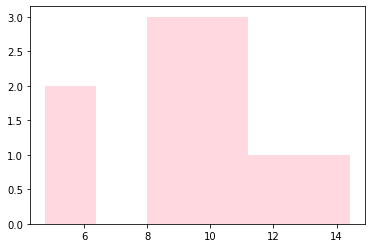

In [22]:
_ = plt.hist(sample, bins='auto', color='pink', alpha=0.6)


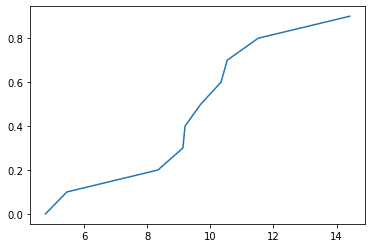

In [57]:
plt.plot(np.sort(sample), np.linspace(0, 1, len(sample), endpoint=False))

**Задача 2.** Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [23]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("./StudentsPerformance.csv")

In [24]:
# посмотрите на первые строки этой таблицы
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [30]:
# выберите несколько (3-6) столбцов для анализа значений в них
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['math score', 'reading score', 'writing score']

df_chosen_columns = df[columns]

df_chosen_columns

# одномерный массив значений одного признака (например, 'math score') можно получить так:
# df_chosen_columns['math score']

math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

Предположите, для каких признаков возможно наличие выбросов. Эту проблему можно решить с помощью параметра range, который определяет, в каких границах строится гистограмма.

В описательной статистике, **`межквартильный размах (IQR)`**, также называемый среднераспространенным, средние 50% или H ‑ spread, является мерой статистической дисперсии, равной разнице между ***75-м*** и ***25-м*** процентилями или между верхним и нижним квартилями: 
$$IQR = Q3 - Q1$$ 
Другими словами, **IQR** - это первый квартиль, вычтенный из третьего квартиля; эти квартили можно ясно увидеть на прямоугольной диаграмме данных. Это усеченная оценка, определяемая как *25% усеченный диапазон*, и обычно используемый надежный показатель масштаба.

**`IQR`** - это мера изменчивости, основанная на о разделении набора данных на квартили. Квартили делят упорядоченный набор данных на четыре равные части. Значения, разделяющие части, называются первым, вторым и третьим квартилями; и обозначаются Q1, Q2 и Q3 соответственно.

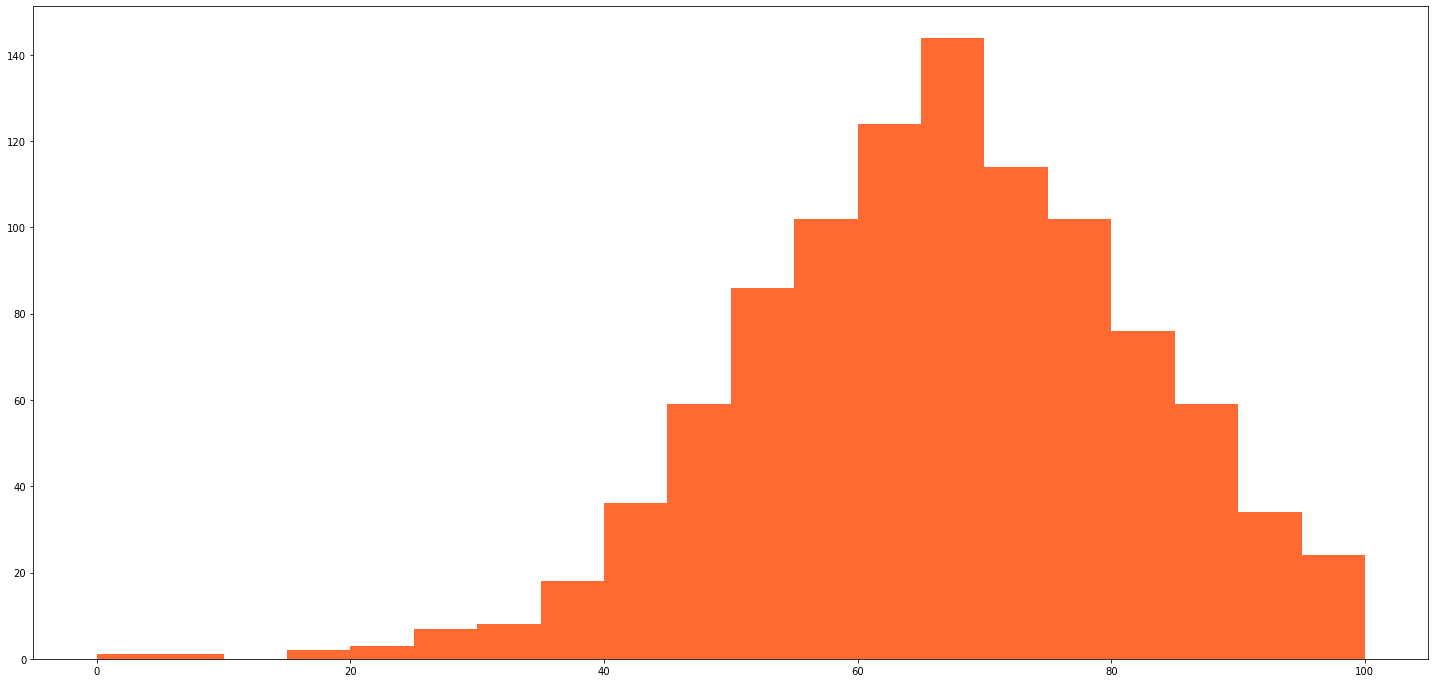

In [55]:
plt.figure(figsize=(25, 12))
plt.hist(df_chosen_columns['math score'], bins=20, color='orangered', alpha = 0.8)
math_score_Q1 = df_chosen_columns['math score'].quantile(0.25)
math_score_Q3 = df_chosen_columns['math score'].quantile(0.75)
math_score_IQR = math_score_Q3 - math_score_Q1

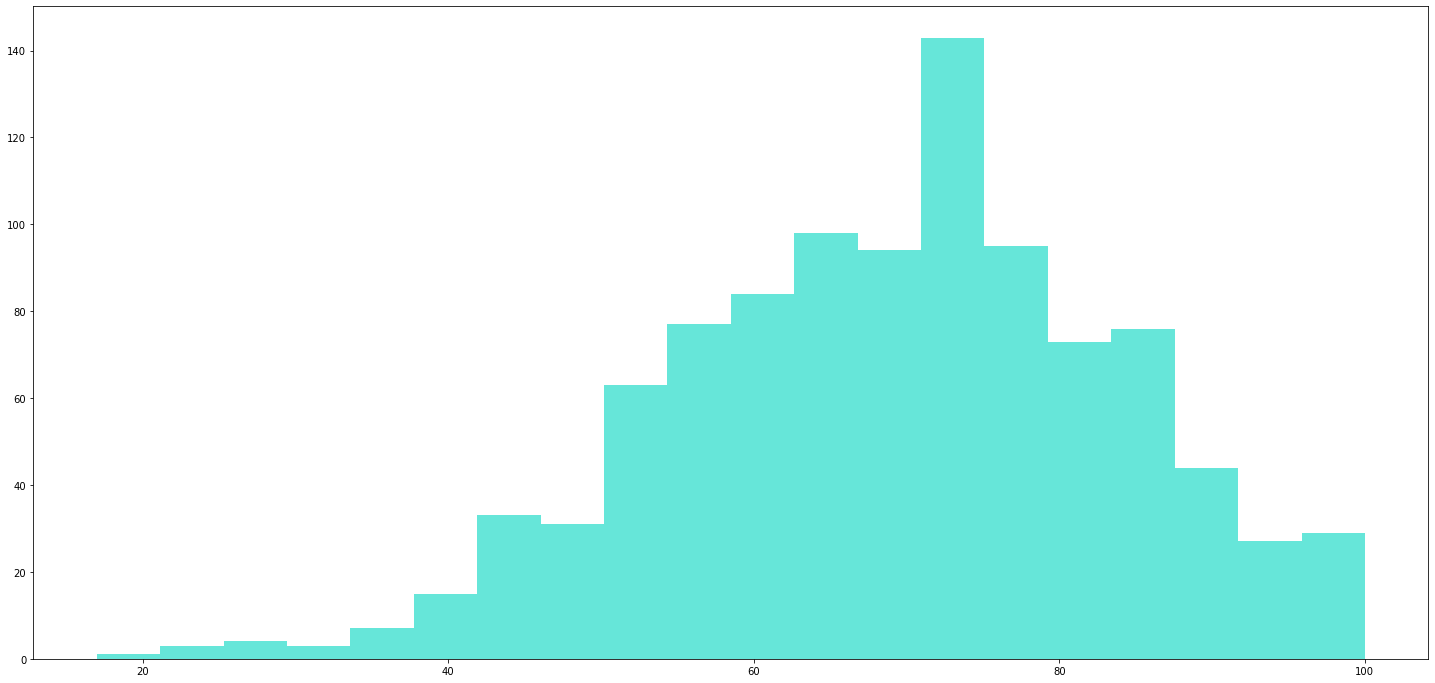

In [54]:
plt.figure(figsize=(25, 12))
plt.hist(df_chosen_columns['reading score'], bins=20, color='turquoise', alpha = 0.8)
reading_score_Q1 = df_chosen_columns['reading score'].quantile(0.25)
reading_score_Q3 = df_chosen_columns['reading score'].quantile(0.75)
reading_score_IQR = reading_score_Q3 - reading_score_Q1

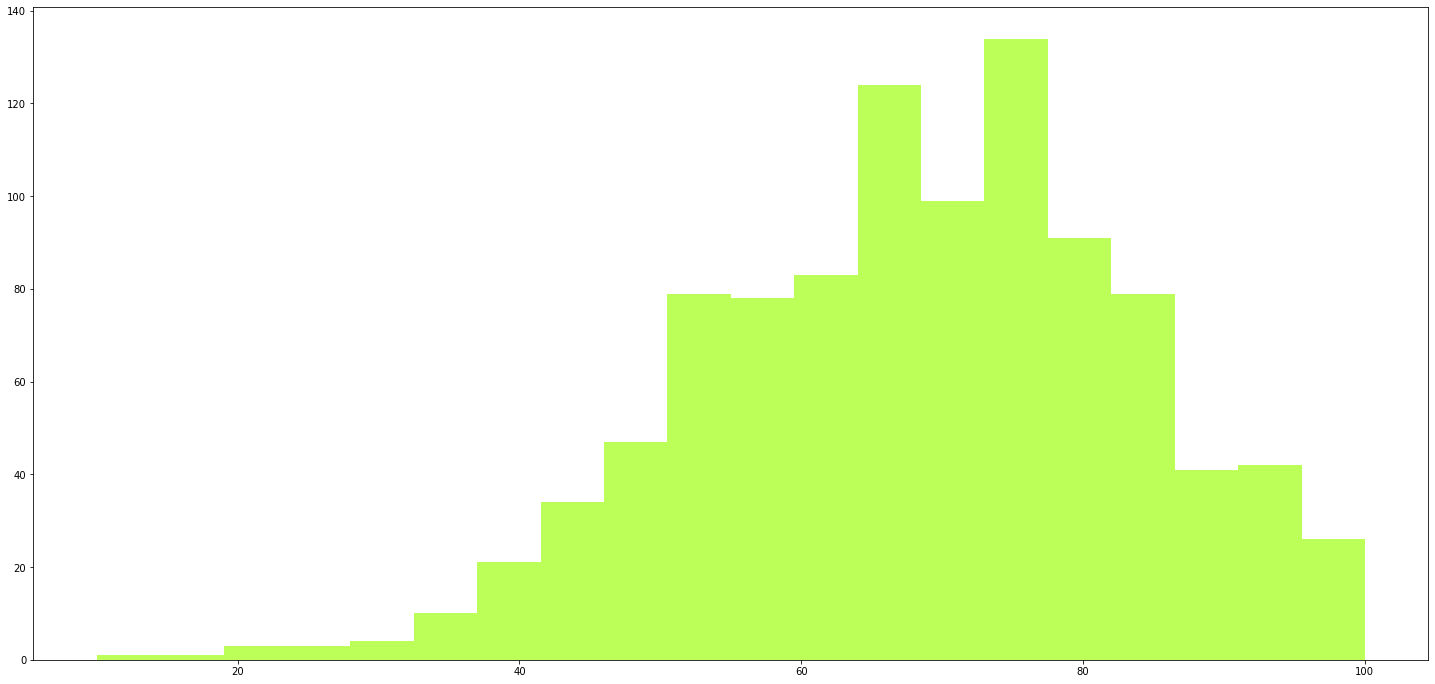

In [52]:
plt.figure(figsize=(25, 12))
plt.hist(df_chosen_columns['writing score'], bins=20, color='greenyellow', alpha = 0.8)
writing_score_Q1 = df_chosen_columns['writing score'].quantile(0.25)
writing_score_Q3 = df_chosen_columns['writing score'].quantile(0.75)
writing_score_IQR = writing_score_Q3 - writing_score_Q1

В словаре ranges_without_outliers укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

In [44]:
ranges_without_outliers = {
    'math score': ((math_score_Q1 - 1.5*math_score_IQR), (math_score_Q3 + 1.5*math_score_IQR)),
    'reading score': ((reading_score_Q1 - 1.5*reading_score_IQR), (reading_score_Q3 + 1.5*reading_score_IQR)),
    'writing score': ((writing_score_Q1 - 1.5*writing_score_IQR), (writing_score_Q3 + 1.5*writing_score_IQR))
}


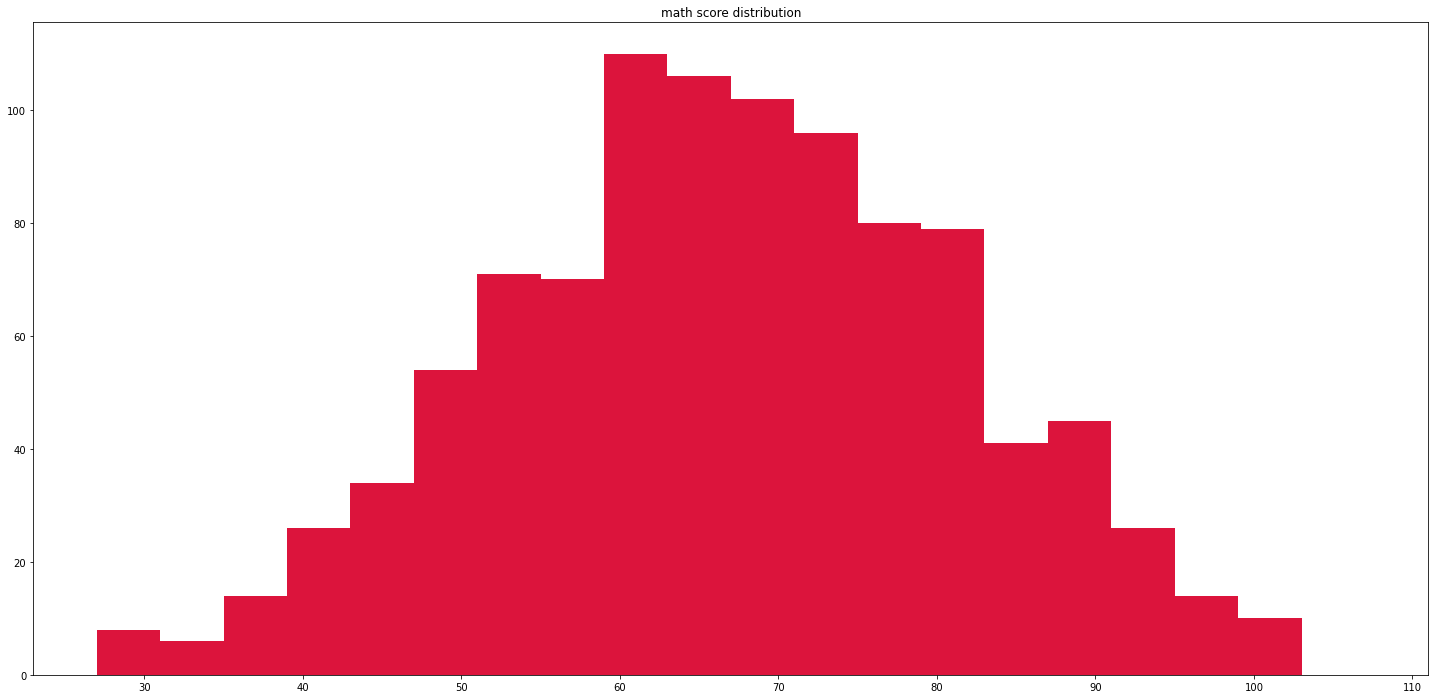

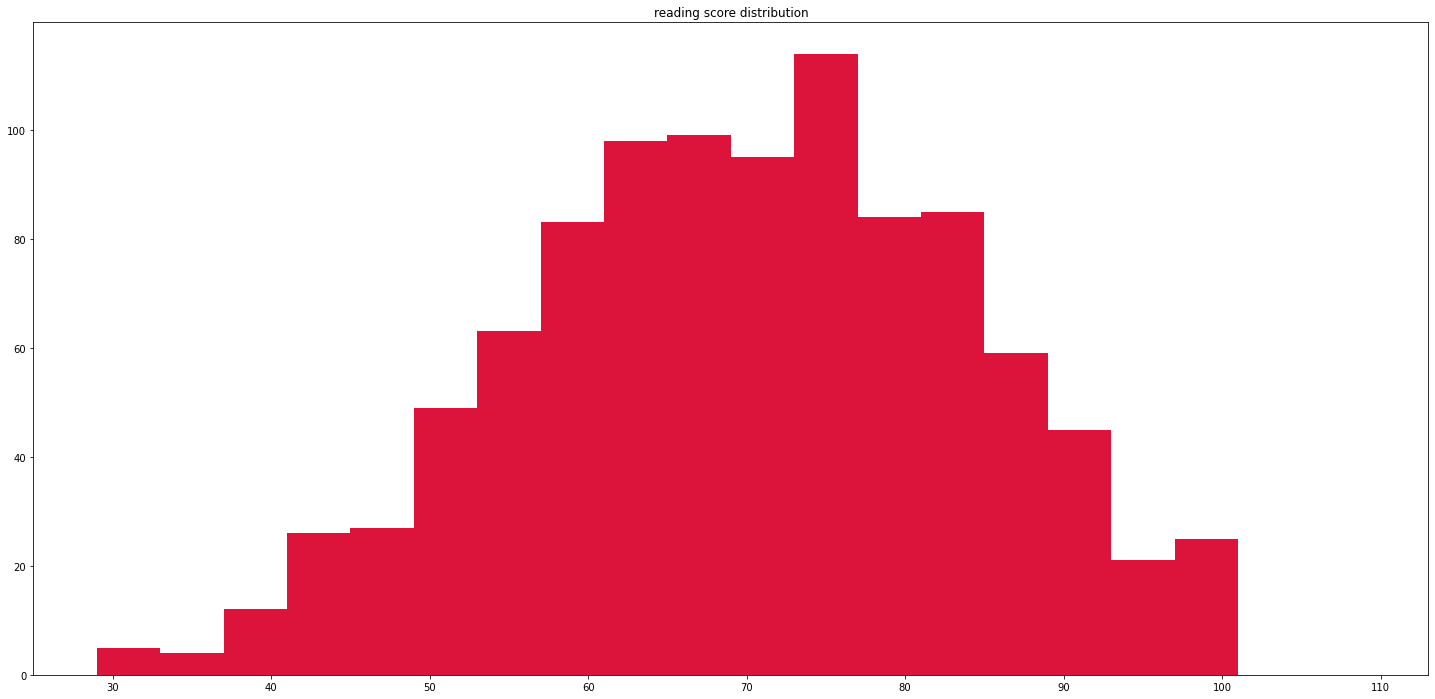

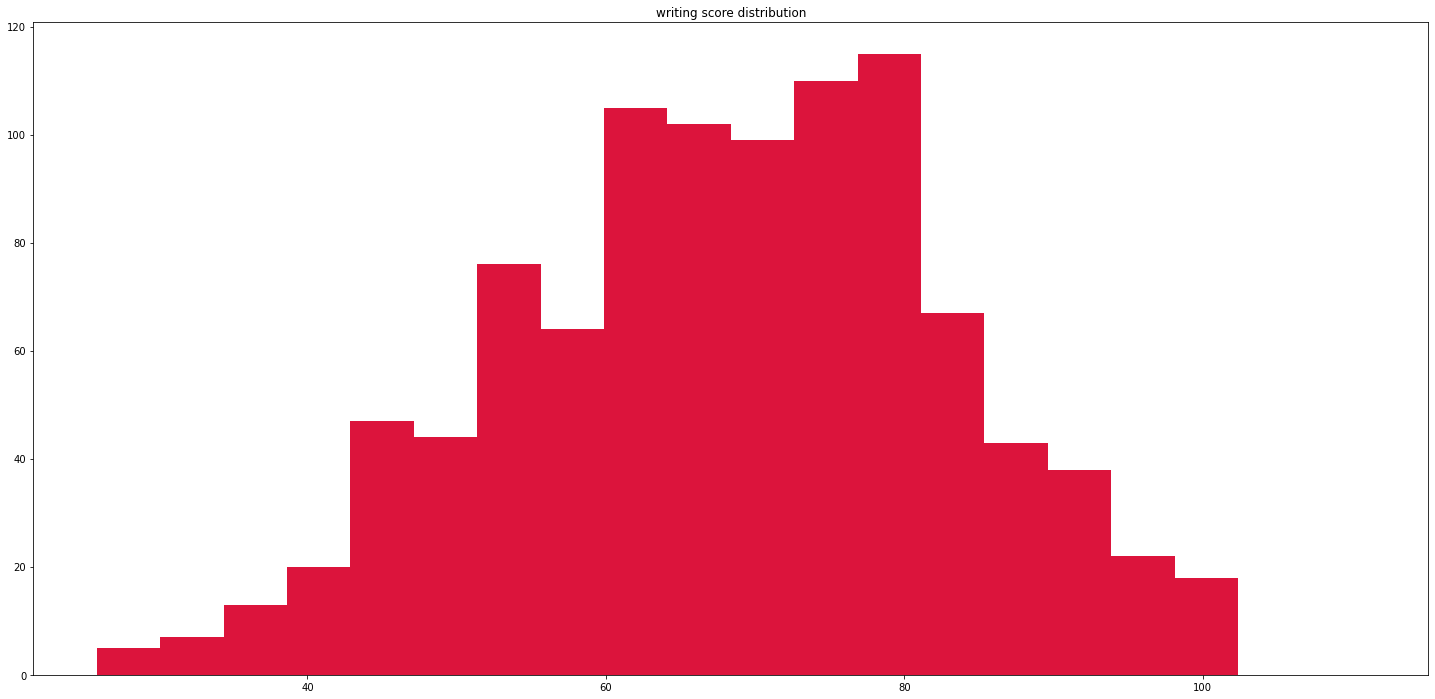

In [56]:
# аналогично определите интервалы для исследуемых признаков
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(25, 12))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20, color='crimson')
    plt.title(column + ' distribution')

Сделайте выводы

Изменилась ли форма распределений, стали ли графики информативнее?